# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Raffa Saputra
- **Email:** raffas2004@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/yeetya21

## Menentukan Pertanyaan Bisnis

- Bagaimana rata-rata tahunan konsentrasi PM2.5 dan PM10 di lokasi Dongsi dan lokasi Guanyuan dari tahun 2013 hingga 2017?
- Pada tahun berapa terjadi penurunan paling signifikan dalam konsentrasi PM2.5 dan PM10 di lokasi Dongsi dan lokasi Guanyuan dari 2013 hingga 2017?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
# prompt: ubahlah untuk kumpulkan semua untuk data PM2.5 dan PM10 Dongsi di file /content/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv
import pandas as pd

# Load the dataset
df_dongsi = pd.read_csv('data/PRSA_Data_Dongsi_20130301-20170228.csv')
df_guanyuan = pd.read_csv('data/PRSA_Data_Guanyuan_20130301-20170228.csv')


In [4]:
df_dongsi

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi
35060,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi
35061,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi
35062,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi


In [5]:
pd.to_datetime(df_dongsi[["year", "month", "day"]])

0       2013-03-01
1       2013-03-01
2       2013-03-01
3       2013-03-01
4       2013-03-01
           ...    
35059   2017-02-28
35060   2017-02-28
35061   2017-02-28
35062   2017-02-28
35063   2017-02-28
Length: 35064, dtype: datetime64[ns]

In [6]:
df_dongsi['Date'] = pd.to_datetime(df_dongsi[['year', 'month', 'day']])

In [7]:
df_dongsi

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Date
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi,2013-03-01
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi,2013-03-01
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi,2013-03-01
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi,2013-03-01
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi,2017-02-28
35060,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi,2017-02-28
35061,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi,2017-02-28
35062,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi,2017-02-28


**Insight:**
- Data PM2.5 dan PM10 dari file CSV dimuat ke dalam DataFrame df_dongsi.
- Menggabungkan kolom 'year', 'month', dan 'day' menjadi satu kolom 'Date'.
- Data disiapkan untuk analisis berbasis waktu, fokus pada PM2.5 dan PM10.

In [8]:
df_guanyuan

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan
35060,35061,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan
35061,35062,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan
35062,35063,2017,2,28,22,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan


In [9]:
pd.to_datetime(df_guanyuan[["year", "month", "day"]])

0       2013-03-01
1       2013-03-01
2       2013-03-01
3       2013-03-01
4       2013-03-01
           ...    
35059   2017-02-28
35060   2017-02-28
35061   2017-02-28
35062   2017-02-28
35063   2017-02-28
Length: 35064, dtype: datetime64[ns]

In [10]:
df_guanyuan['Date'] = pd.to_datetime(df_guanyuan[['year', 'month', 'day']])

In [11]:
df_guanyuan

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Date
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan,2013-03-01
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan,2013-03-01
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan,2013-03-01
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan,2013-03-01
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan,2017-02-28
35060,35061,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan,2017-02-28
35061,35062,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan,2017-02-28
35062,35063,2017,2,28,22,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan,2017-02-28


**Insight:**
- Data PM2.5 dan PM10 dari file CSV dimuat ke dalam DataFrame df_guanyuan.
- Menggabungkan kolom 'year', 'month', dan 'day' menjadi satu kolom 'Date'.
- Data disiapkan untuk analisis berbasis waktu, fokus pada PM2.5 dan PM10.

### Assessing Data

In [12]:
# Menampilkan informasi dasar DataFrame (jumlah baris, kolom, tipe data, dan nilai yang tidak null)
df_dongsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   year     35064 non-null  int64         
 2   month    35064 non-null  int64         
 3   day      35064 non-null  int64         
 4   hour     35064 non-null  int64         
 5   PM2.5    34314 non-null  float64       
 6   PM10     34511 non-null  float64       
 7   SO2      34401 non-null  float64       
 8   NO2      33463 non-null  float64       
 9   CO       31867 non-null  float64       
 10  O3       34400 non-null  float64       
 11  TEMP     35044 non-null  float64       
 12  PRES     35044 non-null  float64       
 13  DEWP     35044 non-null  float64       
 14  RAIN     35044 non-null  float64       
 15  wd       34986 non-null  object        
 16  WSPM     35050 non-null  float64       
 17  station  35064 non-null  object

**Insight:**
- Menampilkan seluruh data untuk memulai proses penilaian

In [13]:
# Memeriksa nilai yang hilang di setiap kolom
df_dongsi.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
Date          0
dtype: int64

**Insight:**
- Melakukan pemeriksaan missing value atau NaN terhadap dataset
- Misalkan dari salah satu kolom, terjadi banyaknya nilai yang hilang, kemungkinan adanya masalah dalam pengumpulan data pada dataset. Sedangkan pada output menunjukkan terdapatnya missing value, yang berarti ada kesalahan dari awal input dataset

In [14]:
# Memeriksa duplikasi data
df_dongsi.duplicated().sum()

0

**Insight:**
- Menghitung jumlah baris terduplikasi dalam df_dongsi.
- Mengidentifikasi adanya duplikasi untuk mencegah bias dalam analisis.
- Jika ada duplikasi, pertimbangkan untuk menghapusnya agar data lebih akurat.

In [15]:
# Menampilkan statistik deskriptif untuk kolom numerik
print("\nDongsi")
df_dongsi.describe()


Dongsi


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,Date
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785,2015-03-01 00:00:00
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000,2014-03-01 00:00:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000,2015-03-01 00:00:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000,2016-02-29 00:00:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000,2017-02-28 00:00:00
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368,NaN


**Insight:**
- Memberikan statistik seperti jumlah, rata-rata, standar deviasi, minimum, persentil, dan maksimum untuk kolom numerik.
- Memahami distribusi dan variasi data di setiap kolom numerik.
- Mengidentifikasi potensi outlier atau anomali dari nilai ekstrem.
- Membandingkan rata-rata dan median untuk melihat simetri distribusi data.

In [16]:
# Menampilkan informasi dasar DataFrame (jumlah baris, kolom, tipe data, dan nilai yang tidak null)
df_guanyuan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   year     35064 non-null  int64         
 2   month    35064 non-null  int64         
 3   day      35064 non-null  int64         
 4   hour     35064 non-null  int64         
 5   PM2.5    34448 non-null  float64       
 6   PM10     34635 non-null  float64       
 7   SO2      34590 non-null  float64       
 8   NO2      34405 non-null  float64       
 9   CO       33311 non-null  float64       
 10  O3       33891 non-null  float64       
 11  TEMP     35044 non-null  float64       
 12  PRES     35044 non-null  float64       
 13  DEWP     35044 non-null  float64       
 14  RAIN     35044 non-null  float64       
 15  wd       34983 non-null  object        
 16  WSPM     35050 non-null  float64       
 17  station  35064 non-null  object

**Insight:**
- Menampilkan seluruh data untuk memulai proses penilaian

In [17]:
# Memeriksa nilai yang hilang di setiap kolom
df_guanyuan.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
Date          0
dtype: int64

**Insight:**
- Melakukan pemeriksaan missing value atau NaN terhadap dataset
- Misalkan dari salah satu kolom, terjadi banyaknya nilai yang hilang, kemungkinan adanya masalah dalam pengumpulan data pada dataset. Sedangkan pada output menunjukkan terdapatnya missing value, yang berarti ada kesalahan dari awal input dataset

In [18]:
# Memeriksa duplikasi data
df_guanyuan.duplicated().sum()

0

**Insight:**
- Menghitung jumlah baris terduplikasi dalam df_dongsi.
- Mengidentifikasi adanya duplikasi untuk mencegah bias dalam analisis.
- Jika ada duplikasi, pertimbangkan untuk menghapusnya agar data lebih akurat.

In [19]:
# Menampilkan statistik deskriptif untuk kolom numerik
print("\nGuanyuan")
df_guanyuan.describe()


Guanyuan


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,Date
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496,2015-03-01 00:00:00
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000,2014-03-01 00:00:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000,2015-03-01 00:00:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000,2016-02-29 00:00:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000,2017-02-28 00:00:00
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071,NaN


**Insight:**
- Memberikan statistik seperti jumlah, rata-rata, standar deviasi, minimum, persentil, dan maksimum untuk kolom numerik.
- Memahami distribusi dan variasi data di setiap kolom numerik.
- Mengidentifikasi potensi outlier atau anomali dari nilai ekstrem.
- Membandingkan rata-rata dan median untuk melihat simetri distribusi data.

### Cleaning Data

In [20]:
coloumn_dongsi = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
df_dongsi[coloumn_dongsi]=df_dongsi[coloumn_dongsi].apply(lambda x: x.fillna(x.mean()), axis=0)
df_dongsi.dropna(subset=['wd'], inplace=True)
df_dongsi.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
Date       0
dtype: int64

**Insight:**
- Nilai kosong pada kolom numerik diisi dengan rata-rata kolom tersebut.
- Baris dengan nilai kosong pada kolom 'wd' dihapus.
- Memastikan tidak ada nilai kosong yang tersisa setelah pengisian dan penghapusan.

In [21]:
coloumn_guanyuan = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
df_guanyuan[coloumn_guanyuan]=df_guanyuan[coloumn_guanyuan].apply(lambda x: x.fillna(x.mean()), axis=0)
df_guanyuan.dropna(subset=['wd'], inplace=True)
df_guanyuan.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
Date       0
dtype: int64

**Insight:**
- Nilai kosong pada kolom numerik diisi dengan rata-rata kolom tersebut.
- Baris dengan nilai kosong pada kolom 'wd' dihapus.
- Memastikan tidak ada nilai kosong yang tersisa setelah pengisian dan penghapusan.

## Exploratory Data Analysis (EDA)

### Explore data df_dongsi dan data df_guanyuan

In [22]:
df_dongsi.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Date
count,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986.000000,34986,34986.000000,34986,34986
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Dongsi,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3861,NaN,34986,NaN
mean,17501.149831,2014.658864,6.524610,15.723947,11.501572,86.152142,110.281956,18.537464,53.648381,1329.264392,57.291110,13.687109,1012.537435,2.453547,0.064137,NaN,1.863465,NaN,2015-02-27 16:38:53.733493504
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN,2013-03-01 00:00:00
25%,8747.250000,2014.000000,4.000000,8.000000,6.000000,23.000000,38.000000,4.000000,28.000000,600.000000,13.000000,3.100000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN,2014-02-28 00:00:00
50%,17495.500000,2015.000000,7.000000,16.000000,12.000000,63.000000,88.000000,10.000000,49.000000,1100.000000,46.000000,14.600000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN,2015-02-27 00:00:00
75%,26246.750000,2016.000000,10.000000,23.000000,17.000000,117.000000,150.000000,24.000000,72.000000,1600.000000,80.000000,23.500000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN,2016-02-27 00:00:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,NaN,10.500000,NaN,2017-02-28 00:00:00


In [23]:
df_guanyuan.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Date
count,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983.000000,34983,34983.000000,34983,34983
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Guanyuan,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5140,NaN,34983,NaN
mean,17501.749621,2014.658949,6.524398,15.724323,11.501701,82.907036,108.986939,17.588565,57.860938,1270.690508,55.845486,13.600091,1011.835906,3.129627,0.067547,NaN,1.711037,NaN,2015-02-27 17:14:52.513506560
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN,2013-03-01 00:00:00
25%,8747.500000,2014.000000,4.000000,8.000000,6.000000,24.000000,41.000000,3.000000,31.000000,600.000000,8.000000,3.200000,1003.200000,-8.100000,0.000000,NaN,0.900000,NaN,2014-02-28 00:00:00
50%,17497.000000,2015.000000,7.000000,16.000000,12.000000,61.000000,90.000000,9.000000,52.000000,1000.000000,44.000000,14.600000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN,2015-02-28 00:00:00
75%,26247.500000,2016.000000,10.000000,23.000000,17.000000,113.000000,148.000000,21.000000,78.000000,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN,2016-02-27 00:00:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,NaN,11.200000,NaN,2017-02-28 00:00:00


In [24]:
df = [df_dongsi,df_guanyuan]
merged_df = pd.concat(df)
merged_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Date
0,1,2013,3,1,0,9.0,9.0,3.000000,17.000000,300.000000,89.000000,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi,2013-03-01
1,2,2013,3,1,1,4.0,4.0,3.000000,16.000000,300.000000,88.000000,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi,2013-03-01
2,3,2013,3,1,2,7.0,7.0,18.531107,17.000000,300.000000,60.000000,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi,2013-03-01
3,4,2013,3,1,3,3.0,3.0,5.000000,18.000000,1330.069131,57.210637,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi,2013-03-01
4,5,2013,3,1,4,3.0,3.0,7.000000,53.699443,200.000000,84.000000,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi,2013-03-01


In [25]:
merged_df.groupby(by = 'station').agg({'PM2.5': 'mean', 'PM10': 'mean'})

,PM2.5,PM10
station,,
Dongsi,86.152142,110.281956
Guanyuan,82.907036,108.986939


In [26]:
merged_df.groupby(by = 'station').agg({"TEMP": ["max", "min"], 'RAIN': ["max", "min"]})

TEMP        RAIN     
           max   min   max  min
station                        
Dongsi    41.1 -16.8  46.4  0.0
Guanyuan  40.5 -16.8  72.5  0.0

In [27]:
merged_df.groupby(by = 'Date').agg({'PM2.5': 'mean', 'PM10': 'mean'})

,PM2.5,PM10
Date,,
2013-03-01,6.979167,10.770833
2013-03-02,28.437500,37.729167
2013-03-03,89.916667,125.333333
2013-03-04,21.270833,41.416667
2013-03-05,147.708333,173.437500
...,...,...
2017-02-24,29.979167,45.458333
2017-02-25,9.958333,20.958333
2017-02-26,27.750000,46.979167


In [28]:
merged_df.to_csv('main_data.csv', index=False)

**Insight:**
Untuk semua proses Exploratory Data Analysis (EDA)
- Menghasilkan deskripsi statistik (rata-rata, standar deviasi, dll.) untuk data stasiun Dongsi dan Guanyuan.
- Data stasiun Dongsi dan Guanyuan digabungkan untuk analisis lebih lanjut.
- Menghitung rata-rata konsentrasi PM2.5 dan PM10 untuk masing-masing stasiun.
- Menghitung nilai maksimum dan minimum untuk temperatur dan curah hujan di setiap stasiun.
- Menghitung rata-rata harian konsentrasi PM2.5 dan PM10 untuk melihat tren fluktuasi harian.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

* Bagaimana rata-rata tahunan konsentrasi PM2.5 dan PM10 di lokasi Dongsi dan lokasi Guanyuan dari tahun 2013 hingga 2017?

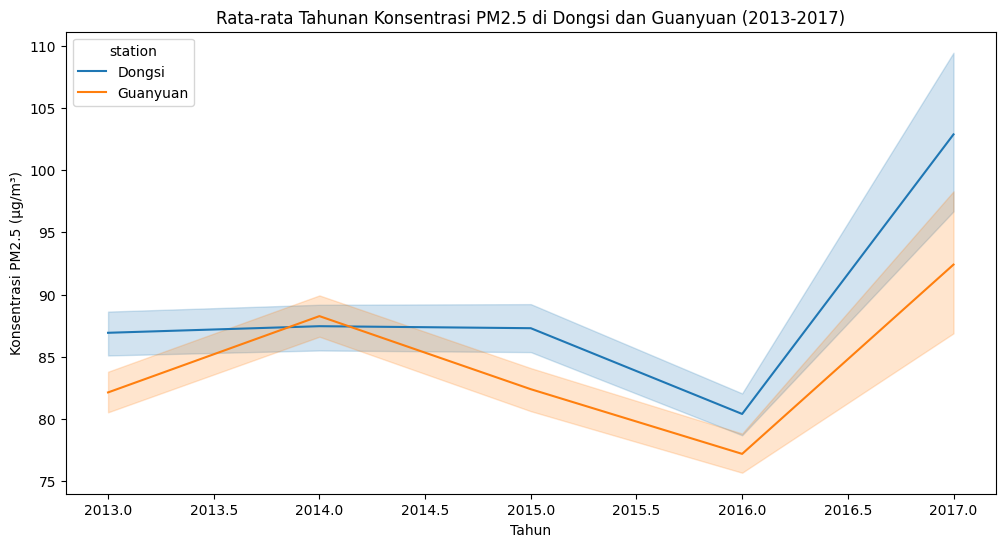

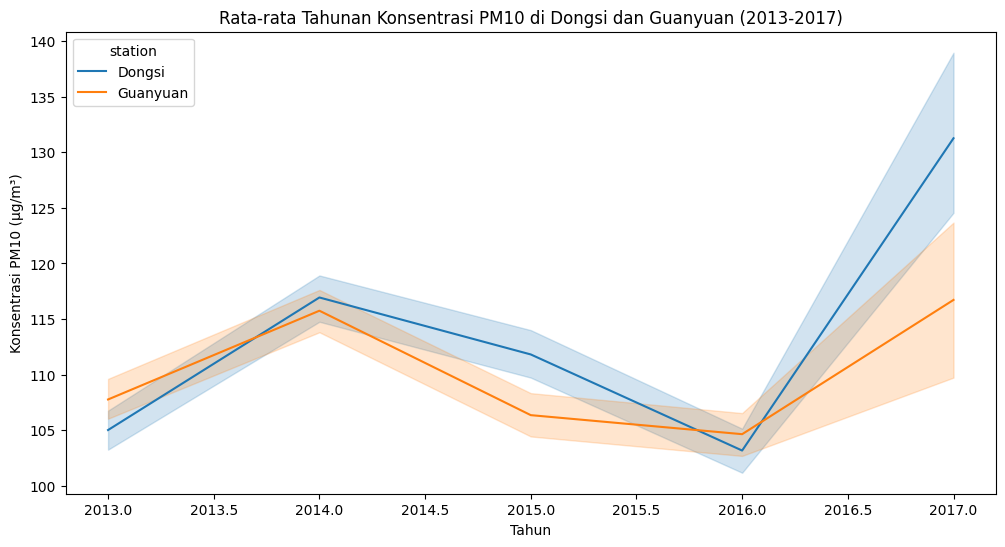

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='PM2.5', hue='station', data=merged_df)
plt.title('Rata-rata Tahunan Konsentrasi PM2.5 di Dongsi dan Guanyuan (2013-2017)')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi PM2.5 (μg/m³)')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='PM10', hue='station', data=merged_df)
plt.title('Rata-rata Tahunan Konsentrasi PM10 di Dongsi dan Guanyuan (2013-2017)')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi PM10 (μg/m³)')
plt.show()

**Insight:**
- Grafik garis dibuat untuk melihat tren tahunan konsentrasi PM2.5 dan PM10 dari tahun 2013 hingga 2017.
- Grafik membandingkan konsentrasi polutan di stasiun Dongsi dan Guanyuan menggunakan parameter hue='station'.
- Membantu memahami perubahan kualitas udara di kedua stasiun dan melihat dampak faktor eksternal pada konsentrasi polutan.

### Pertanyaan 2:

* Pada tahun berapa terjadi penurunan paling signifikan dalam konsentrasi PM2.5 dan PM10 di lokasi Dongsi dan lokasi Guanyuan dari 2013 hingga 2017?

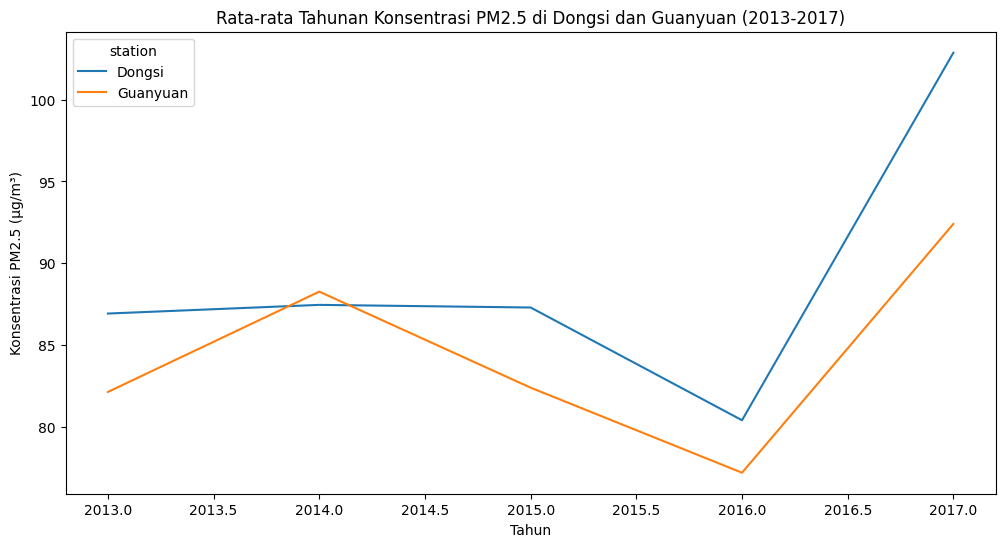

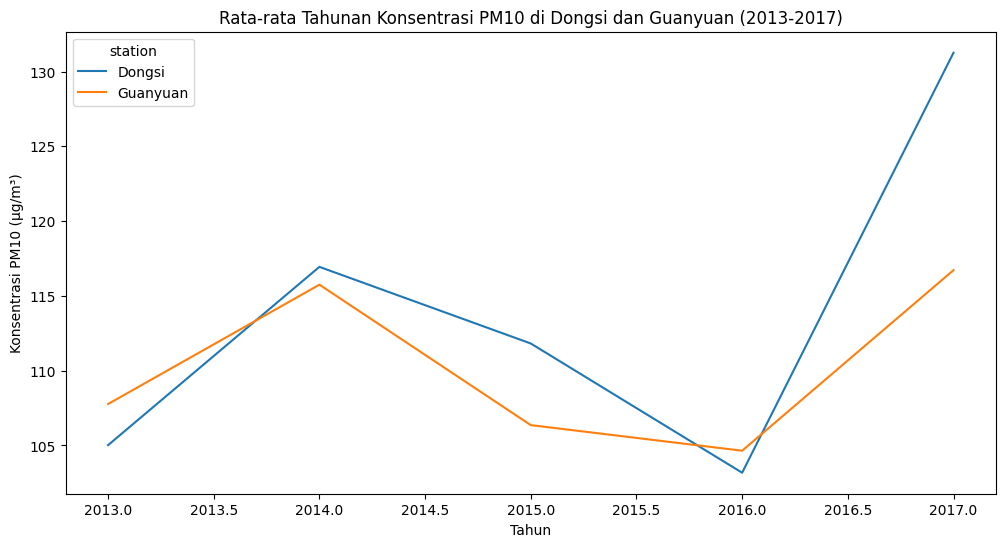

Tahun dengan penurunan paling signifikan dalam konsentrasi PM2.5:
    station  year  PM2.5_change
6    Dongsi  2016     -0.078924
5  Guanyuan  2015     -0.066513

Tahun dengan penurunan paling signifikan dalam konsentrasi PM10:
    station  year  PM10_change
6    Dongsi  2016    -0.077276
5  Guanyuan  2015    -0.081129


In [30]:
# Group data by year and station, then calculate the mean PM2.5 and PM10
yearly_avg = merged_df.groupby(['year', 'station'])[['PM2.5', 'PM10']].mean().reset_index()

# Create line plots for PM2.5 and PM10 for each station
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='PM2.5', hue='station', data=yearly_avg)
plt.title('Rata-rata Tahunan Konsentrasi PM2.5 di Dongsi dan Guanyuan (2013-2017)')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi PM2.5 (μg/m³)')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='PM10', hue='station', data=yearly_avg)
plt.title('Rata-rata Tahunan Konsentrasi PM10 di Dongsi dan Guanyuan (2013-2017)')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi PM10 (μg/m³)')
plt.show()

# Calculate the percentage change in PM2.5 and PM10 from the previous year
yearly_avg['PM2.5_change'] = yearly_avg.groupby('station')['PM2.5'].pct_change()
yearly_avg['PM10_change'] = yearly_avg.groupby('station')['PM10'].pct_change()

# Find the year with the most significant decrease in PM2.5 and PM10 for each station
pm25_decrease_year = yearly_avg.loc[yearly_avg.groupby('station')['PM2.5_change'].idxmin()]
pm10_decrease_year = yearly_avg.loc[yearly_avg.groupby('station')['PM10_change'].idxmin()]

print("Tahun dengan penurunan paling signifikan dalam konsentrasi PM2.5:")
print(pm25_decrease_year[['station', 'year', 'PM2.5_change']])
print("\nTahun dengan penurunan paling signifikan dalam konsentrasi PM10:")
print(pm10_decrease_year[['station', 'year', 'PM10_change']])


**Insight:**
- Data PM2.5 dan PM10 dirata-ratakan per tahun dan stasiun (Dongsi dan Guanyuan) untuk mengamati tren polusi udara dari tahun 2013 hingga 2017.
- Dibuat visualisasi garis untuk melihat perubahan tahunan konsentrasi PM2.5 dan PM10. Membantu melihat pola perubahan dan perbedaan antar stasiun.
- Menghitung perubahan persentase tahunan untuk memahami seberapa besar kenaikan atau penurunan polutan tiap tahun.
- Mengindikasikan waktu di mana kualitas udara membaik, mungkin akibat kebijakan atau kondisi lingkungan tertentu.


## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1

  Berdasarkan grafik rata-rata tahunan konsentrasi PM2.5 dan PM10 di stasiun Dongsi dan Guanyuan pada periode 2013-2017, terlihat bahwa kedua polutan memiliki tren yang serupa di kedua stasiun. Pada tahun 2014, terjadi peningkatan konsentrasi PM2.5 dan PM10, diikuti penurunan pada tahun 2015 dan 2016, sebelum naik tajam kembali pada tahun 2017. Stasiun Dongsi cenderung memiliki konsentrasi yang lebih tinggi dibandingkan dengan Guanyuan, terutama pada tahun 2017. Peningkatan signifikan pada tahun 2017 menunjukkan adanya kenaikan polusi udara, yang mungkin disebabkan oleh perubahan aktivitas manusia atau kondisi lingkungan. Penurunan sementara pada tahun 2015 dan 2016 mengindikasikan kemungkinan keberhasilan sementara dalam pengurangan polusi udara, namun efek tersebut tidak berlanjut hingga 2017.


- Conclution pertanyaan 2

  Berdasarkan grafik rata-rata tahunan konsentrasi PM2.5 dan PM10 di stasiun Dongsi dan Guanyuan pada periode 2013-2017, terlihat bahwa konsentrasi polutan di kedua stasiun memiliki pola tren yang serupa. Pada tahun 2014, terjadi peningkatan pada konsentrasi PM2.5 dan PM10 di kedua stasiun, diikuti penurunan signifikan pada tahun 2015 dan 2016. Namun, pada tahun 2017, terjadi peningkatan tajam kembali pada konsentrasi kedua polutan, dengan stasiun Dongsi menunjukkan kenaikan yang lebih drastis dibandingkan Guanyuan. Berdasarkan perhitungan perubahan persentase tahunan, tahun dengan penurunan paling signifikan dalam konsentrasi PM2.5 dan PM10 untuk kedua stasiun adalah tahun 2016, yang menunjukkan adanya perbaikan sementara dalam kualitas udara. Akan tetapi, peningkatan tajam pada tahun 2017 menunjukkan kemungkinan kembali memburuknya kondisi kualitas udara akibat berbagai faktor lingkungan atau aktivitas manusia.